# openCV

### Read, show image, write image, set waitKey,

In [ ]:
import cv2

img = cv2.imread('data/lena.jpg', 1) #read image 1)color, 0)grayscale, -1)Load image including alpha channel(degree of transparancy)
print(img) # print images in the form of array
cv2.imshow('image', img) # display image
k = cv2.waitKey(0)  # showing img for 5 sec

if k == 27:  # if someone press esc key
    cv2.destroyAllWindows()
elif k == ord('s'): # if someone press s key
    cv2.imwrite('lena_image.png', img)

## Live video sharing

In [ ]:
import cv2

cap = cv2.VideoCapture(0);# 0 means the main camera if have multiple camera the can give 1,2,3..
print(cap.isOpened()) # return true if video is opened else False
while (cap.isOpened()):
    ret, frame = cap.read() # ret boolean field return True if frame present else Fasle

    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cv2.imshow('frame', gray)

    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


## Saving video using fourcc
#### FourCC is a 4-byte code used to specify the video codec

In [2]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('data/output.avi', fourcc, 20.0, (640, 480))
#out = cv2.VideoWriter('vide_name.avi', fourcc, fps, (size))

print(cap.isOpened())
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

True


## Draw geometric shapes on images using Python OpenCV
p1-Starting co-ordinates
<br>
p2-Ending co-ordinates

In [73]:
import numpy as np
import cv2

img = cv2.imread('data/lena.jpg',1)

#img = cv2.line(img, p1, p2, (BGR), thickness)
img = cv2.line(img, (0,0), (255,255), (0,0,255), 3)

img = cv2.arrowedLine(img, (0,255), (255,255), (255,0,0), 3)

img = cv2.rectangle(img, (384, 0), (510, 128), (0, 0, 255), 10)

# img = cv2.circle(img, center, radius, color, thickness)
img = cv2.circle(img, (447,63), 63, (0,255,0), -1) #-1 fill whole circle

#put text on image
#cv2.putText(img, text, co-ordinate, font-face)
font_face = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'OpenCv', (10, 500), font_face, 4, (0, 255, 255), 10, cv2.LINE_AA)

cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Changin resolution of camera
#### set some properties to captured images<br>
#### cap.set(self, propId, value)

In [3]:
import cv2
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(3, 1280)
cap.set(4, 720)


print(cap.get(3))
print(cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0


## Texing & Date Time on video 

In [6]:
import datetime
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)
# print(cap.get(3))
# print(cap.get(4))
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        font = cv2.FONT_HERSHEY_SIMPLEX #font style(font-face)
        text = 'Width: '+ str(cap.get(3)) + 'Height:' + str(cap.get(4)) #converting value to string
        datet = str(datetime.datetime.now()) #converting value to string
        frame = cv2.putText(frame, datet, (10, 50), font, 1,(0, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


## Handle Mouse Events
#### cv2.setMouseCallback()

In [2]:
import numpy as np
import cv2

# event = [i for i in dir(cv2) if 'EVENT' in i] # print all the EVENT
# print(event)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # left moust button event
        print(x,',',y)
        font = cv2.FONT_HERSHEY_COMPLEX
        strXY = str(x) + ', ' + str(y) # converting to string
        cv2.putText(img, strXY, (x,y), font, 1, (255, 255, 0), 2)
        cv2.imshow('image', img)

img = np.zeros((512, 512, 3), np.uint8) # black image using numpy 
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

262 , 126
187 , 251
154 , 199
399 , 311
181 , 331


#### Showing co-ordiantes and RGB color

In [3]:
import numpy as np
import cv2

# event = [i for i in dir(cv2) if 'EVENT' in i] # print all the EVENT
# print(event)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,',',y)
        font = cv2.FONT_HERSHEY_COMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(img, strXY, (x,y), font, 1, (255, 255, 0), 2)
        cv2.imshow('image', img)
    
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        font = cv2.FONT_HERSHEY_COMPLEX
        strBGR = str(blue) + ', ' + str(green) + ', ' + str(red)
        cv2.putText(img, strBGR, (x,y), font, .5, (0, 255, 255), 2)
        cv2.imshow('image',img)
        
# img = np.zeros((512, 512, 3), np.uint8) # creating black image using numpy
img = cv2.imread('data/messi.jpg', 1)
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()


566 , 292
331 , 393
385 , 143


#### Connecting click events using cv2.line

In [4]:
import numpy as np
import cv2

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 3, (0,0,255), -1)
        points.append((x,y))
    
    if len(points) >= 2: # if points list have more than 2 values 
        cv2.line(img, points[-1], points[-2], (0,0,255), 1)
    cv2.imshow('image', img)
img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('image', img)
points = []
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adding click event to show image colour in the clicked position

In [41]:
import numpy as np
import cv2

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[x, y, 0]
        green = img[x, y, 1]
        red = img[x, y, 2]
        mycolorImg = np.zeros((512, 512, 3), np.uint8)
        mycolorImg[:] = [blue, green, red]
        cv2.imshow('color', mycolorImg)
        
img = cv2.imread('data/lena.jpg', 1)
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Arithmetic operation using openCV

In [5]:
import numpy as np
import cv2
       
img = cv2.imread('data/messi.jpg', 1)

print(img.shape) # return the number of rows, columns, and channels
print(img.size) # return tottal number of pixels
print(img.dtype) # return datatype of img

b,g,r = cv2.split(img) # split bgr channels to b, g, r
img = cv2.merge((b,g,r)) 

ball = img[280:340, 330:390] # selecting a part in the image and add in another location
img[273:333, 100:160] = ball



cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(679, 1020, 3)
2077740
uint8


### Add two images
##### In order to add two images need to have the images or the arrays of same size

In [6]:
import cv2

img = cv2.imread('data/messi.jpg')
img2 = cv2.imread('data/spider.png')


print(img.shape)
print(img2.shape)

img = cv2.resize(img, (512, 512))
img2 = cv2.resize(img2, (512, 512))

# img3 = cv2.add(img2, img) # adding image
img3 = cv2.addWeighted(img, 0.4, img2, 0.6, 0)
#img3 = cv2.addWeighted(img, weight1, img2, weight2, img, gamma value)


cv2.imshow('image', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(679, 1020, 3)
(850, 940, 3)


### bit-wise operations on images

<img src='data/logic_table.gif' width=400 height=400>

## AND

In [6]:
import cv2

img1 = cv2.imread('data/1bit1.png')
img2 = cv2.imread('data/2bit2.png')

bitWisAnd = cv2.bitwise_and(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseAnd',bitWisAnd)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## OR

In [7]:
import cv2

img1 = cv2.imread('data/1bit1.png')
img2 = cv2.imread('data/2bit2.png')

bitWisOr = cv2.bitwise_or(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseOr', bitWisOr)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## NOT

In [14]:
import cv2

img1 = cv2.imread('data/1bit1.png')
img2 = cv2.imread('data/2bit2.png')

bitWiseNot = cv2.bitwise_not(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseNOt', bitWiseNot)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## XOR

In [17]:
import cv2

img1 = cv2.imread('data/1bit1.png')
img2 = cv2.imread('data/2bit2.png')

bitWiseXOR = cv2.bitwise_xor(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseNot', bitWiseXOR)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## Bind Trackbar To OpenCV Windows

In [ ]:
import numpy as np
import cv2 

def nothing(x): # call back function if will be called when ever the value of trackbar changed
    # print(x)
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image') # named window

# Here create named window so that we can pass the name of window to createTrackbar 
cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)
# cv2.createTrackbar(trackbarName, windowName, value, count, onChange)



while(True):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')

    img[:] = [b, g, r]
     


cv2.destroyAllWindows()

<div>
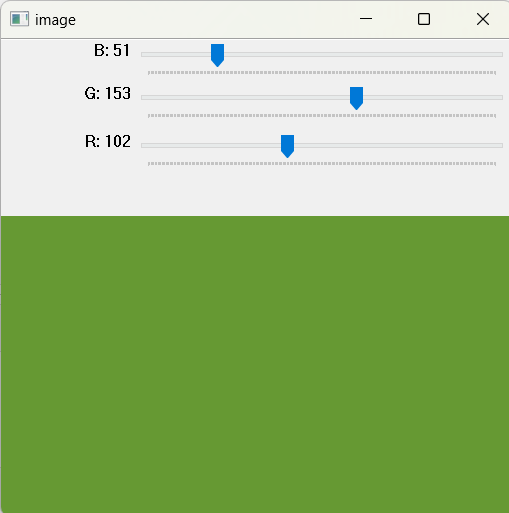
</div>

## Adding switch

In [3]:
import numpy as np
import cv2 

def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')


cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)

switch = '0 : OFF\n 1: ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)


while(True):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
     
cv2.destroyAllWindows()

<div>
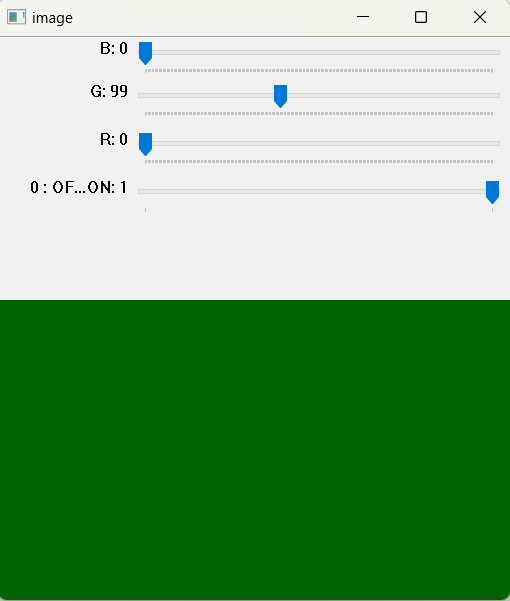
</div>

In [5]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass
#     print(x)

# Create a black image, a window
cv.namedWindow('image')

cv.createTrackbar('CP', 'image', 10, 400, nothing)

switch = 'color/gray'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    img = cv.imread('lena.jpg')
    pos = cv.getTrackbarPos('CP', 'image')
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img, str(pos), (50, 150), font, 6, (0, 0, 255), 10)
    s = cv.getTrackbarPos(switch, 'image')

    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if s == 0:
        pass
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img = cv.imshow('image',img)

cv.destroyAllWindows()

## Object Detection and Object Tracking Using HSV Color Space

In [3]:
import cv2
import numpy as np

img = cv2.imread('data/smarties.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#lower bound blue value
lower_bound = np.array([110, 50, 50])
#upper bound blue value
upper_bound = np.array([130, 255, 255])

#creating a mask of blue colour
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# only the blue coloured objects are highlighted and stored in n_image
n_image = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow('image', img)
cv2.imshow('mask', mask)
cv2.imshow('n_image', n_image)

if cv2.waitKey(0) & 0xFF == 27: 
    cv2.destroyAllWindows()

#### Using track bar giving lower and upper bound values

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    frame = cv2.imread('data/smarties.png')
    
    # convert to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #lower hue
    l_h = cv2.getTrackbarPos("LH", "Tracking")
    #lower saturation
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    #lower value
    l_v = cv2.getTrackbarPos("LV", "Tracking")
    
    #upper hue
    u_h = cv2.getTrackbarPos("UH", "Tracking")
    #upper saturation
    u_s = cv2.getTrackbarPos("US", "Tracking")
    #upper value
    u_v = cv2.getTrackbarPos("UV", "Tracking")
    
    #lower bound - lower blue value
    l_b = np.array([l_h, l_s, l_v])
    #upper bound - upper blue value
    u_b = np.array([u_h, u_s, u_v])
    
    #creating a mask of blue colour
    mask = cv2.inRange(hsv, l_b, u_b)
    
    # only the blue coloured objects are highlighted and stored in res
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

<div>
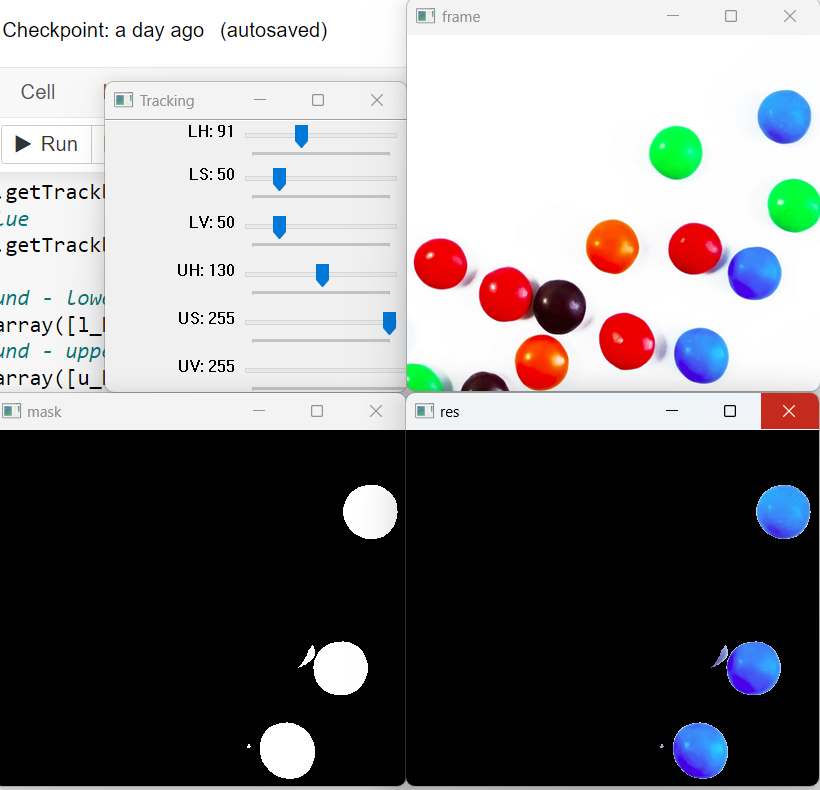
</div>

## Object detection in video
cap = cv2.videoCapture(0)<br>
_, frame = cap.read()<br>
cap.release()

In [20]:
import cv2
import numpy as np

def nothing(x):
    pass
cap = cv2.VideoCapture(0)

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
#     frame = cv2.imread('smarties.png')
    _, frame = cap.read()
    
    # convert to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #lower hue
    l_h = cv2.getTrackbarPos("LH", "Tracking")
    #lower saturation
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    #lower value
    l_v = cv2.getTrackbarPos("LV", "Tracking")
    
    #upper hue
    u_h = cv2.getTrackbarPos("UH", "Tracking")
    #upper saturation
    u_s = cv2.getTrackbarPos("US", "Tracking")
    #upper value
    u_v = cv2.getTrackbarPos("UV", "Tracking")
    
    #lower bound - lower blue value
    l_b = np.array([l_h, l_s, l_v])
    #upper bound - upper blue value
    u_b = np.array([u_h, u_s, u_v])
    
    #creating a mask of blue colour
    mask = cv2.inRange(hsv, l_b, u_b)
    
    # only the blue coloured objects are highlighted and stored in res
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

# THRESHOLDING

In [1]:
import cv2
import numpy as np

img = cv2.imread('data/gradient.png')

# if the value of the pixel is less than 127 the value is assigned to 0, if grator than 127 the pixel value is assigned 
# 255 that means white if the value of the pixel is 0 it will look black and if the value of the pixel 255 it will look while
# binary thresholding either white or black
_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# inverse of binary thresholding
_, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# when the pixel value is less than 127 the pixel value will  change and after the threshold which is 127 the pixel value will
# remain the same 
_, th3 = cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)

# when the pixel value is less than threshold 127 the value assigned to pixel will be zero when pixel value grator than 127
# pixel value remain the same
_, th4 = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO)

# inverse of THRESH_TOZERO
_, th5 = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO_INV)


cv2.imshow('image', img)
cv2.imshow('BINARY', th1)
cv2.imshow('BINARY_INV', th2)
cv2.imshow('TRUNC',th3)  
cv2.imshow('THRESH_TOZERO',th4)  
cv2.imshow('T_TOZERO_INV',th4)  


cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
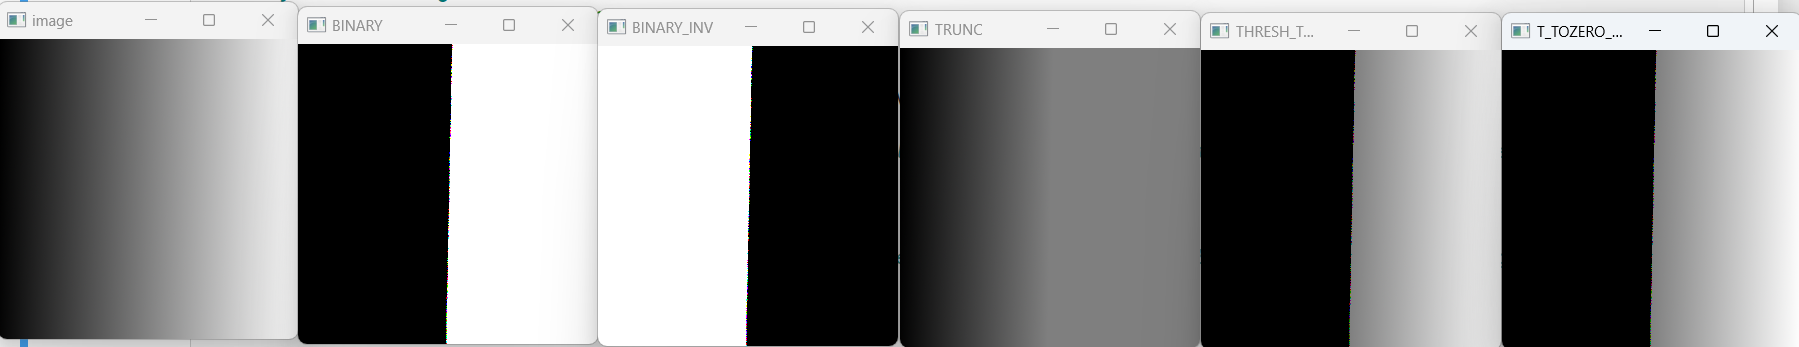
</div>

## Adaptive Threshold

In [16]:
import cv2 as cv
import numpy as np

img = cv.imread('data/sudoku.png',0)
_, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
#        adaptiveThreshold(source(img), maxvalue, adaptive method, threshold type, block, size, c)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

cv.imshow("Image", img)
cv.imshow("THRESH_BINARY", th1)
cv.imshow("ADAPTIVE_THRESH_MEAN_C", th2)
cv.imshow("ADAPTIVE_THRESH_GAUSSIAN_C", th3)

cv.waitKey(0)
cv.destroyAllWindows()

<div>
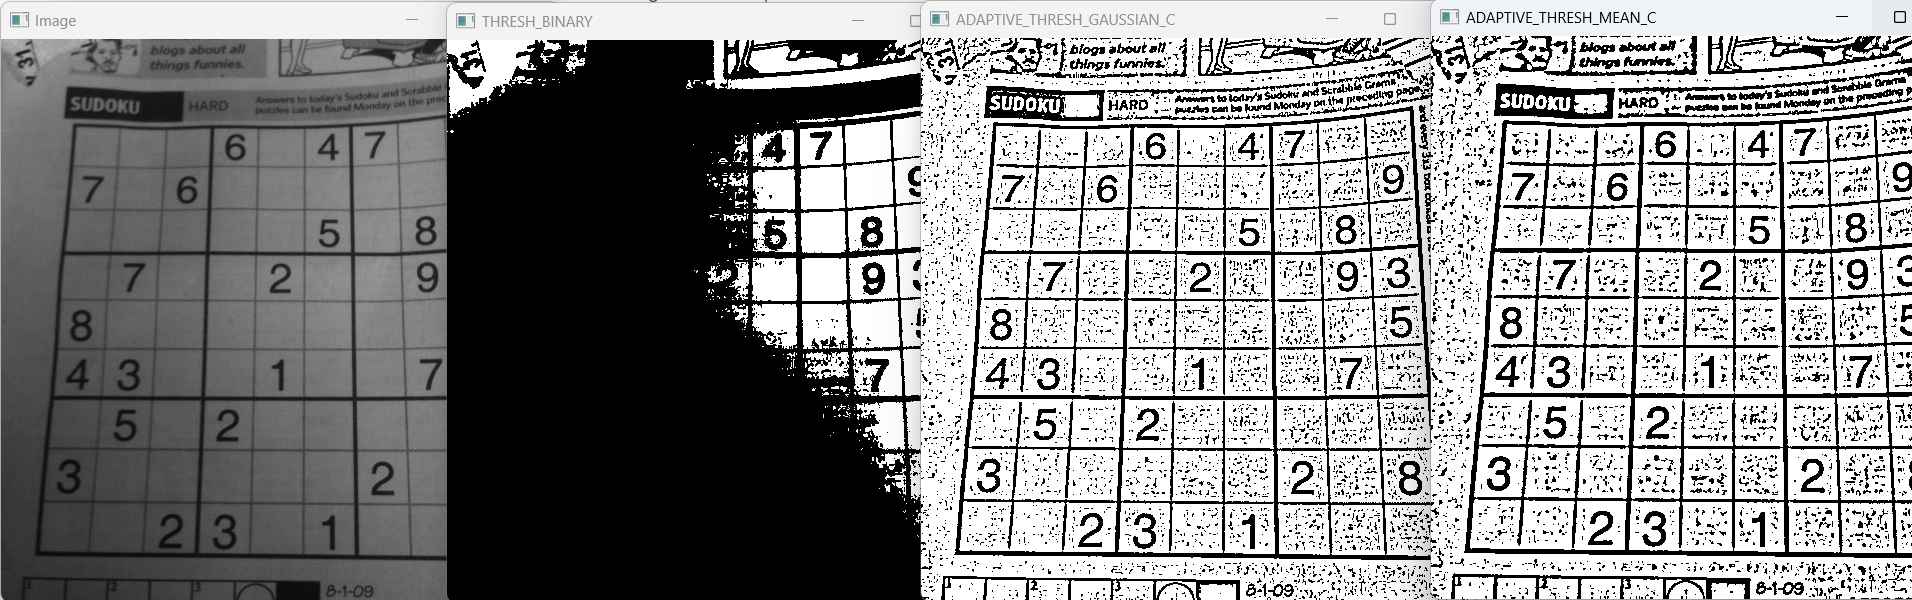
</div>

# Matplotlib with OpenCV

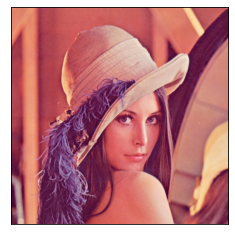

In [1]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', -1)
cv2.imshow('image', img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### Show multiple windows in one matplotlib window

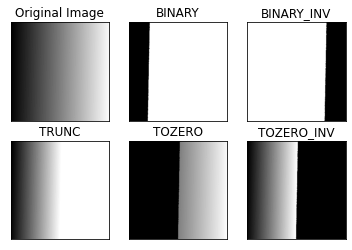

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.png',0)
_, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1 ,th2 ,th3 ,th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#cv.imshow("Image", img)
#cv.imshow("th1", th1)
#cv.imshow("th2", th2)
#cv.imshow("th3", th3)
#cv.imshow("th4", th4)
#cv.imshow("th5", th5)
plt.show()
#cv.waitKey(0)
#cv.destroyAllWindows()

# Morphological Transformations  
##### Morphological Transformations are some simple operations based on the image shape. Normally perfomed on binary images there are two things are required for Morphological Transformations first one is the orginal image and the second one is called a structuring element or a KERNAL tells you how to change the value of any given pixel by combining it with different amount of neighbering pixels

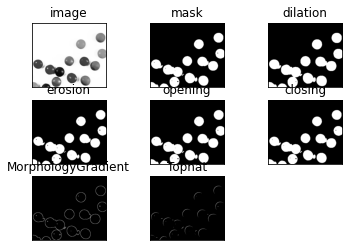

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('data/smarties.png', cv.IMREAD_GRAYSCALE)
_, mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV)

#The bigger the rectangle is the better the result will be but there is a problem 
#when we increase the size of the rectanble the size of white area increases
kernel = np.ones((2, 2), np.uint8)
# kernel = np.ones((5, 5), np.uint8)


#remove black dots from our mask for this we use dilation
#iterations - how many dialation that we need to perform
dilation = cv.dilate(mask, kernel, iterations=2)
erotion = cv.erode(mask, kernel, iterations=1)
opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
MorphologyGradient = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)
Tophat = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernel)
blackhat = cv.morphologyEx(mask, cv.MORPH_BLACKHAT, kernel)

titles = ['image','mask','dilation','erosion','opening','closing','MorphologyGradient','Tophat','blackhat']
images = [img, mask, dilation, erotion,opening,closing,MorphologyGradient,Tophat,blackhat]

for i in range(8):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Smoothing Images | Blurring Images OpenCV

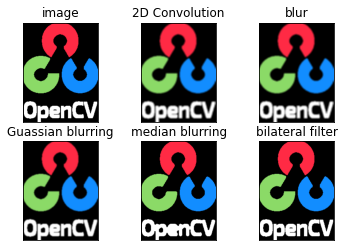

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/opencv-logo-white.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# width * height , 5 * 5 = 25
kernel = np.ones((5, 5), np.float32)/25
#filter 2D is used for homogeneous filter
destination = cv2.filter2D(img, -1, kernel)
#blur is used to applay averagin algorithm for bluring the image
blur = cv2.blur(img, (5, 5))
#Gaussian blurring 
gblur = cv2.GaussianBlur(img, (5, 5), 0)

#median filter replace each pixel's value with the median of its neighboring pixels
#kernal size must be odd except 1 
median = cv2.medianBlur(img, 5)

#for sharp edges can use bilateralfilter
bilateralfilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'Guassian blurring', 'median blurring','bilateral filter']
images = [img, destination, blur, gblur,median,bilateralfilter]

for i in range(0, len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

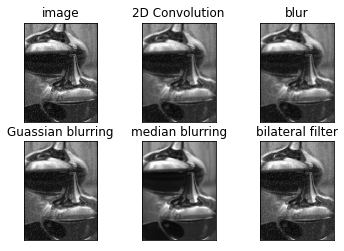

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/Noise_salt_and_pepper.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# width * height , 5 * 5 = 25
kernel = np.ones((5, 5), np.float32)/25
#filter 2D is used for homogeneous filter
destination = cv2.filter2D(img, -1, kernel)
#blur is used to applay averagin algorithm for bluring the image
blur = cv2.blur(img, (5, 5))
#Gaussian blurring 
gblur = cv2.GaussianBlur(img, (5, 5), 0)

#median filter replace each pixel's value with the median of its neighboring pixels
#kernal size must be odd except 1 
median = cv2.medianBlur(img, 5)

#for sharp edges can use bilateralfilter
bilateralfilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'Guassian blurring', 'median blurring','bilateral filter']
images = [img, destination, blur, gblur,median,bilateralfilter]

for i in range(0, len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

When using median blurring get best result for salt and pepper noise images

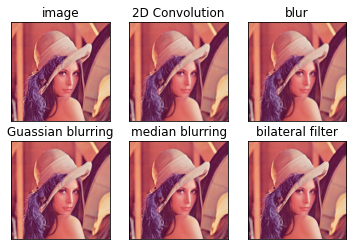

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# width * height , 5 * 5 = 25
kernel = np.ones((5, 5), np.float32)/25
#filter 2D is used for homogeneous filter
destination = cv2.filter2D(img, -1, kernel)
#blur is used to applay averagin algorithm for bluring the image
blur = cv2.blur(img, (5, 5))
#Gaussian blurring 
gblur = cv2.GaussianBlur(img, (5, 5), 0)

#median filter replace each pixel's value with the median of its neighboring pixels
#kernal size must be odd except 1 
median = cv2.medianBlur(img, 5)

#for sharp edges can use bilateralfilter
bilateralfilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'Guassian blurring', 'median blurring','bilateral filter']
images = [img, destination, blur, gblur,median,bilateralfilter]

for i in range(0, len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Edges are more clear when using bilateral filter

##  Image Gradients and Edge Detection

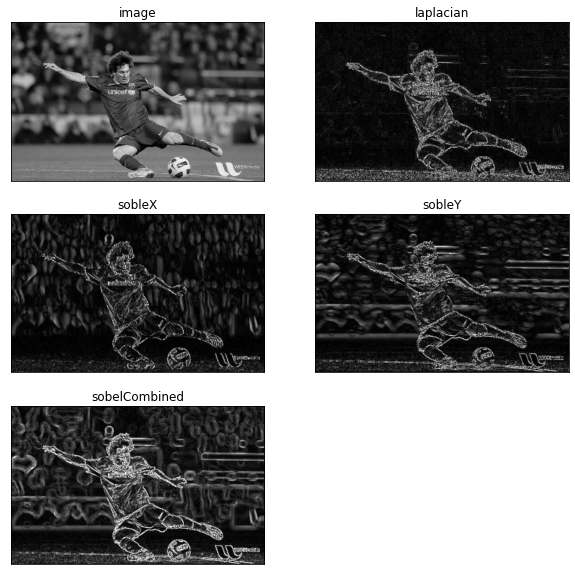

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('data/messi5.jpg', cv2.IMREAD_GRAYSCALE)
# laplacian give as an absalute value of the image
# ksize - kernal size
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
# convert this absalute value back to the unsigned int
lap = np.uint8(np.absolute(lap))
# Sobel(original_image,ddepth,xorder,yorder,kernelsize)
# 1 - Using sobelX
sobleX = cv2.Sobel(img, cv2.CV_64F, 1, 0)

sobleX = np.uint8(np.absolute(sobleX))
# 0 - Using sobelY
sobleY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobleY = np.uint8(np.absolute(sobleY))

#combining SobelX and SobelY using bitwise_or 

sobelCombined = cv2.bitwise_or(sobleX, sobleY)

title = ['image','laplacian','sobleX','sobleY','sobelCombined']
image = [img, lap,sobleX,sobleY,sobelCombined]

plt.figure(figsize=(10, 10))
for i in range(0, len(image)):
    plt.subplot(3, 2, i+1), plt.imshow(image[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])
plt.show()

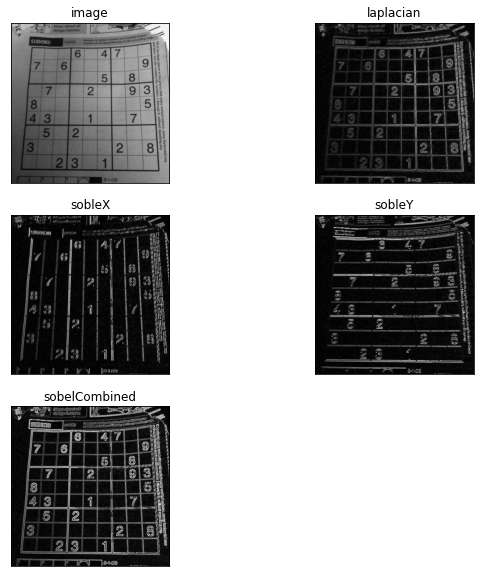

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('data/sudoku.png', cv2.IMREAD_GRAYSCALE)
# laplacian give as an absalute value of the image
# ksize - kernal size
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
# convert this absalute value back to the unsigned int
lap = np.uint8(np.absolute(lap))
# Sobel(original_image,ddepth,xorder,yorder,kernelsize)
# 1 - Using sobelX
sobleX = cv2.Sobel(img, cv2.CV_64F, 1, 0)

sobleX = np.uint8(np.absolute(sobleX))
# 0 - Using sobelY
sobleY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobleY = np.uint8(np.absolute(sobleY))

#combining SobelX and SobelY using bitwise_or 

sobelCombined = cv2.bitwise_or(sobleX, sobleY)

title = ['image','laplacian','sobleX','sobleY','sobelCombined']
image = [img, lap,sobleX,sobleY,sobelCombined]

plt.figure(figsize=(10, 10))
for i in range(0, len(image)):
    plt.subplot(3, 2, i+1), plt.imshow(image[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## Canny Edge Detection in OpenCV
Syntax: cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

Where: 

Image: Input image to which Canny filter will be applied<br>
T_lower: Lower threshold value in Hysteresis Thresholding<br>
T_upper: Upper threshold value in Hysteresis Thresholding<br>
aperture_size: Aperture size of the Sobel filter.<br>
L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.

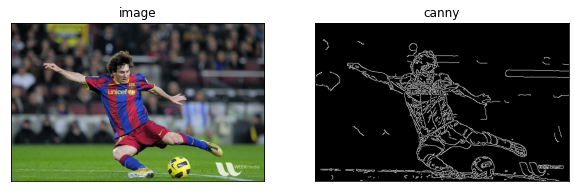

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/messi5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]

plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

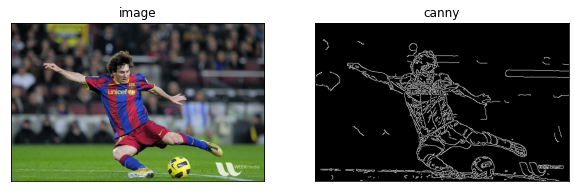

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/messi5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]

plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

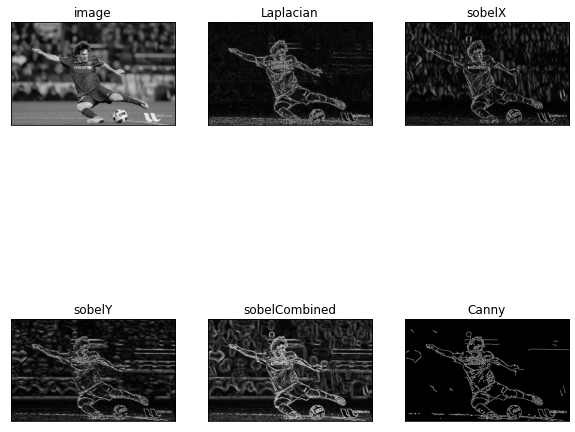

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/messi5.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]

plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Image Pyramids with Python and OpenCV

### Gaussian pyramid pyrUP,  pyrDown

In [4]:
import cv2
img = cv2.imread('data/lena.jpg')
#pyrDown reduce image resolution
lr = cv2.pyrDown(img)
lr2 = cv2.pyrDown(lr)

cv2.imshow('image', img)
cv2.imshow('pyrDown1', lr)
cv2.imshow('pyrDown2', lr2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
img = cv2.imread('data/lena.jpg')
#pyrUp increase image resolution
ur = cv2.pyrUp(img)
ur1 = cv2.pyrUp(ur)

cv2.imshow('image', img)
cv2.imshow('pyrDown1', ur)
cv2.imshow('pyrDown2', ur1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
import cv2
img = cv2.imread('lena.jpg')
#pyrUp increase image resolution
lr = cv2.pyrDown(img)
ur = cv2.pyrUp(lr)


cv2.imshow('image', img)
cv2.imshow('pyrDown1', ur)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
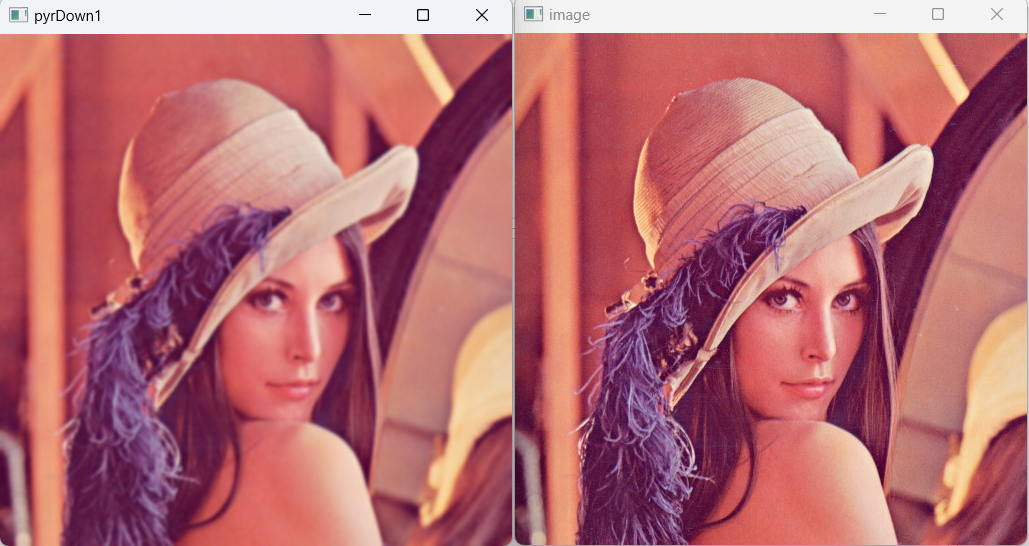
</div>

when using pyrDown() method loose information about the orginal image, and when try to resize the pyrDown() image 
get an blurred image

In [17]:
import cv2
img = cv2.imread('data/lena.jpg')
# copy orginal image to layer using copy()
layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    #converting int into str
    cv2.imshow(str(i), layer)
    
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Laplacian pyramid
A level in Laplacian pyramid is formed by the difference between that level in Gaussian Pyramid and 
extended version of its upper level in Gaussian Pyramid
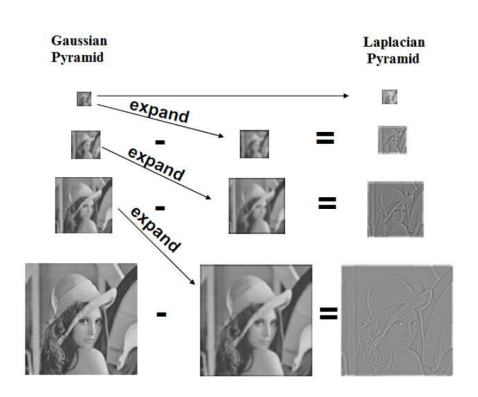

In [22]:
import cv2
import numpy as np
img = cv2.imread("data/lena.jpg")
layer = img.copy()
gaussian_pyramid_list = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)
    #cv2.imshow(str(i), layer)

layer = gaussian_pyramid_list[5]
cv2.imshow('upper level Gaussian Pyramid', layer)
laplacian_pyramid_list = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid_list[i])
    # between that level in Gaussian Pyramid and extended version of its upper level in Gaussian Pyramid
    laplacian = cv2.subtract(gaussian_pyramid_list[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)

cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Applications of image pyramids

## Image blending(mergin)

In [22]:
import cv2
import numpy as np

apple = cv2.imread('data/apple.jpg')
orange = cv2.imread('data/orange.jpg')
blending = np.hstack((apple[:,:256], orange[:,256:]))

cv2.imshow('apple', apple)
cv2.imshow('orange', orange)
cv2.imshow('blending', blending)

cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
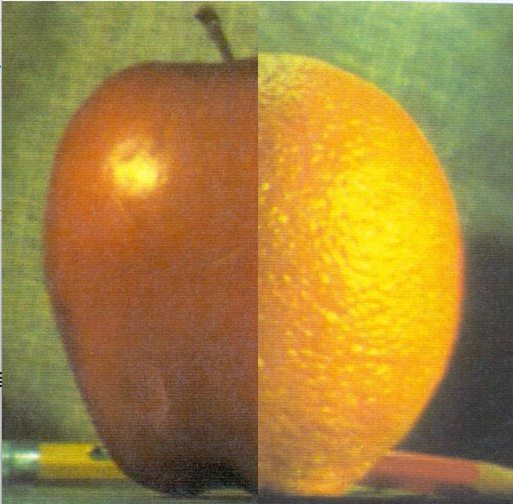
</div>

In order to blend two images using image pyramid we need to follow 5 steps 
1) Load the two images<br>
2) Find the Gaussian Pyramid for each images<br>
3) From Gaussian Pyramid find their Laplacian Pyramids<br>
4) Join left half of first image and right half of second image in each level of Laplacian Pyramid<br>
5) Joint image Pyramids<br>

In [24]:
import cv2
import numpy as np
apple = cv2.imread('data/apple.jpg')
orange = cv2.imread('data/orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))

# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

cv2.imshow("apple", apple)
cv2.imshow("orange", orange)
cv2.imshow("apple_orange", apple_orange)
cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)


<div>
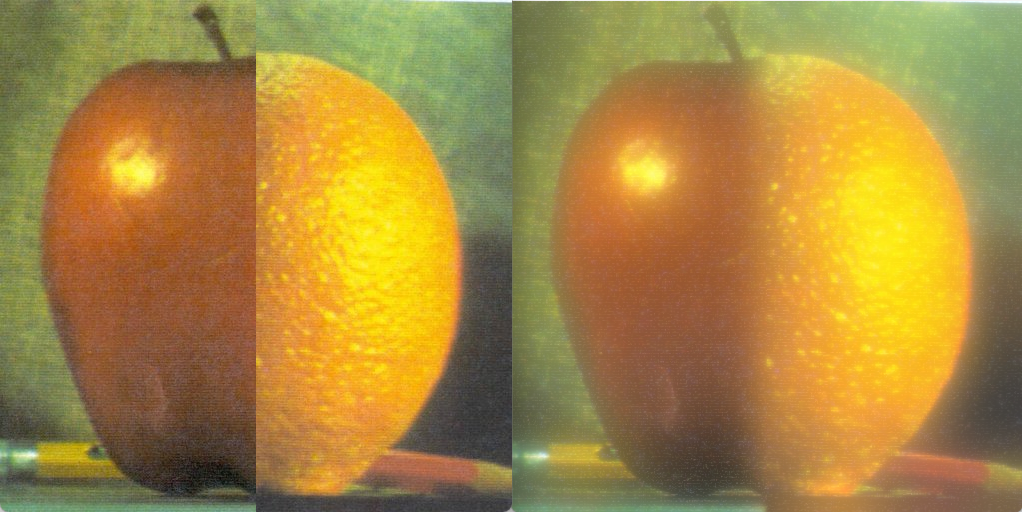
</div>

# Contours

###### Countours are defined as a curve joining all the cts points having the same color or intensity. We focus to find the boundary 
###### in the binary image

###### "Contours are the usefull tool for shape analysis and object detection and recognition"
##### For better accuracy we generally use binary images for finding the Contours

In [7]:
import cv2

img = cv2.imread('data/opencv-logo-white.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#for finding contours we need two variables countours, hierarchy 

#countours is a python list of all the countours in the image. Each individual 
#contours is a Numpy array of (x, y) coordinate  of boundary points of the object
countours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#printing number of countour in countours list
print('Number of countours = ' + str(len(countours)))
# print(countours[0])
                  #img, countours, -1 draw all contours, color, thickness
                  #                 0 first countours -inside countours list
                  #                 1 second countours -inside countours list
cv2.drawContours(img, countours, -1, (0, 255, 0), 3)
  

cv2.imshow('Image', img)
cv2.imshow('Image Gray', imgray)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of countours = 12


## Motion Detection and Tracking Using Opencv Contours
###### simple motion detection

In [3]:
import cv2  
import numpy as np

cap = cv2.VideoCapture('data/vtest.avi')

#reading some frame from the video
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    # absolute difference between fram1, fram2
    diff = cv2.absdiff(frame1, frame2)
    # converting diff into grayscale 
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    # bluring gray
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # finding threshold
    #_, means not going to use this value
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dialate = cv2.dilate(thresh, None, iterations=3)
    #_, means not going to use this value
    contours, _ = cv2.findContours(dialate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)
    
    
    
    cv2.imshow('feed', frame1)
    frame1 = frame2 
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

#### Drawing rectangle on moving things - simple object detection

In [8]:
import cv2  
import numpy as np

cap = cv2.VideoCapture('data/vtest.avi')

#reading some frame from the video
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    # absolute difference between fram1, fram2
    diff = cv2.absdiff(frame1, frame2)
    
    # converting diff into grayscale 
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    # bluring gray
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # finding threshold
    #_, means not going to use this value
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    dialate = cv2.dilate(thresh, None, iterations=3)
    
    #_, means not going to use this value
    contours, _ = cv2.findContours(dialate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #Here we dont need to draw contours we need to draw rectangle around people
    #for this need to iterate over all the contours
    for countour in contours:
        (x, y ,w, h) = cv2.boundingRect(countour)
        
        if cv2.contourArea(countour) < 700:
            continue
        else:
            cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame1, 'Status:{}'.format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        # if this area is less than certain value do nothing else draw rectangle
        
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)
    
    
    
    cv2.imshow('feed', frame1)
    frame1 = frame2 
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

## Detect Simple Geometric Shapes

<div>
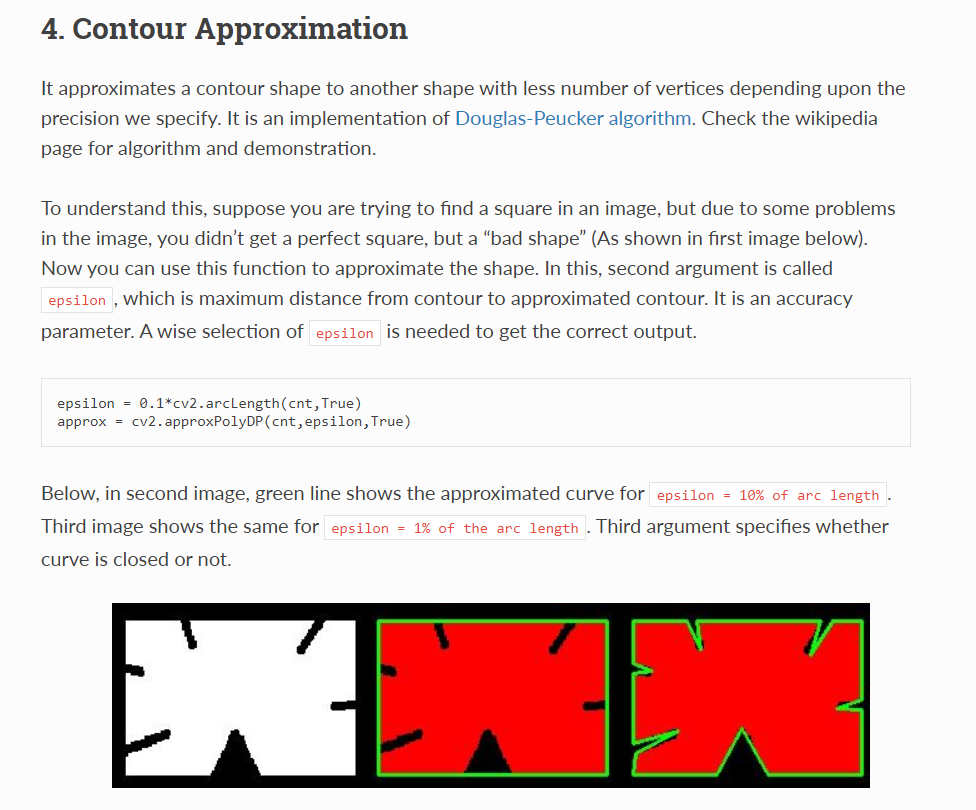
</div>

In [42]:
import numpy as np
import cv2

img = cv2.imread('data/vllCR.png')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.imshow("img", img)
for contour in contours:               # accuracy parametor  if we have closed edges True
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    # now wee need to print shape based on the contours 
    # we need to print the shape, so need to find x, y co-ordiantes for this we can use approx.ravel
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
         # here we need to find our it is square or rectangle for this we use boundingRect, aspectRatio
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h  # aspect ratio of rectangle
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


cv2.imshow("shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.515606936416185
1.6764705882352942
1.0
